<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/SamVerse/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
charts = "/content/drive/MyDrive/Colab Notebooks/charts.csv"

## Data Preparation and Cleaning

> We will be begin our data cleansing using these three methods

*   Importing data from Google Drive
*   Removing null data
*   Removng duplicates
*   List item





Import Data

**1. Pandas**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%%time
df = pd.read_csv(charts)
df.head(5)

CPU times: user 53.3 s, sys: 6.62 s, total: 59.9 s
Wall time: 1min 19s


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


**2. PySpark**

In [6]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=9d0372814b613f4d812eb0c569eed8d9a5893212d331722dc9682257bce2adc9
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [7]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
spark = SparkSession.builder.getOrCreate()

In [ ]:
%%time
df_py = spark.read.csv(charts, header = True)
df_py.show(5)

+--------------------+----+----------+--------------------+--------------------+---------+------+-------------+-------+
|               title|rank|      date|              artist|                 url|   region| chart|        trend|streams|
+--------------------+----+----------+--------------------+--------------------+---------+------+-------------+-------+
|Chantaje (feat. M...|   1|2017-01-01|             Shakira|https://open.spot...|Argentina|top200|SAME_POSITION| 253019|
|Vente Pa' Ca (fea...|   2|2017-01-01|        Ricky Martin|https://open.spot...|Argentina|top200|      MOVE_UP| 223988|
|Reggaetón Lento (...|   3|2017-01-01|                CNCO|https://open.spot...|Argentina|top200|    MOVE_DOWN| 210943|
|              Safari|   4|2017-01-01|J Balvin, Pharrel...|https://open.spot...|Argentina|top200|SAME_POSITION| 173865|
|         Shaky Shaky|   5|2017-01-01|        Daddy Yankee|https://open.spot...|Argentina|top200|      MOVE_UP| 153956|
+--------------------+----+----------+--

**3. Koalas**

In [3]:
!pip install koalas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 8.3 MB/s eta 0:00:00


In [9]:
import databricks.koalas as ks

In [10]:
%%time
df_ks = ks.read_csv(charts)
df_ks.head(5)

CPU times: user 535 ms, sys: 55 ms, total: 590 ms
Wall time: 1min 24s


,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956


Removing null

**1. Pandas**

In [ ]:
df.isnull().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [ ]:
%%time
df = df.dropna()

CPU times: user 11.1 s, sys: 653 ms, total: 11.7 s
Wall time: 11.7 s


In [ ]:
df.isnull().sum()

title      0
rank       0
date       0
artist     0
url        0
region     0
chart      0
trend      0
streams    0
dtype: int64

**2. Pyspark**

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
df_py1 = df_py.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df_py1.show(5)

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.8/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
%%time
df_py = df_py.dropna()

CPU times: user 4.66 ms, sys: 0 ns, total: 4.66 ms
Wall time: 38 ms


In [ ]:
df_py1 = df_py.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df_py1.show()

+-----+----+----+------+---+------+-----+-----+-------+
|title|rank|date|artist|url|region|chart|trend|streams|
+-----+----+----+------+---+------+-----+-----+-------+
|   69|   0|   0|    66|  0|     0|    0|    0|      0|
+-----+----+----+------+---+------+-----+-----+-------+



**3. Koalas**

In [11]:
df_ks.isnull().sum()

title            0
rank             0
date             0
artist           0
url              0
region           0
chart            0
trend            0
streams    5848001
dtype: int64

In [12]:
%%time
df_ks.dropna(how='all', inplace = True) 

CPU times: user 157 ms, sys: 13.6 ms, total: 171 ms
Wall time: 931 ms


In [13]:
df_ks.isnull().sum()

title            0
rank             0
date             0
artist           0
url              0
region           0
chart            0
trend            0
streams    5848001
dtype: int64

Removing duplicates

**1. Pandas**

In [ ]:
%time
df = df.drop_duplicates()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


**2. Pyspark**

In [ ]:
%time
df_py.dropDuplicates()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.2 µs


DataFrame[title: string, rank: string, date: string, artist: string, url: string, region: string, chart: string, trend: string, streams: string]

**3. Koalas**

In [ ]:
%time
df_ks.drop_duplicates().head(5)

##Perform exploratory analysis & visualization

Compute the mean for 'streams' column

**1. Pandas**

In [ ]:
%time
print("The median for Rating column is:",df['streams'].median()), print()
%time
print("The mean for Rating column is:",round(df['streams'].mean(), 2)), print()
%time
print("The mode for Rating column is:",df['streams'].mode())

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 23.1 µs
The median for Rating column is: 9565.0

CPU times: user 0 ns, sys: 28 µs, total: 28 µs
Wall time: 33.4 µs
The mean for Rating column is: 55261.33

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
The mode for Rating column is: 0    1002.0
dtype: float64


**2. Pyspark**

In [ ]:
%time
from pyspark.sql.functions import mean
print(df_py.select(mean('streams')).collect())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
[Row(avg(streams)=55266.54339716303)]


Get the distribution of streams across different region.

**1. Pandas**

In [ ]:
df["region"].value_counts()

Brazil           364516
Argentina        364385
United States    364184
Austria          363925
Australia        362189
                  ...  
Russia           100768
Ukraine          100766
Bulgaria          94842
South Korea       59576
Luxembourg         8962
Name: region, Length: 69, dtype: int64

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


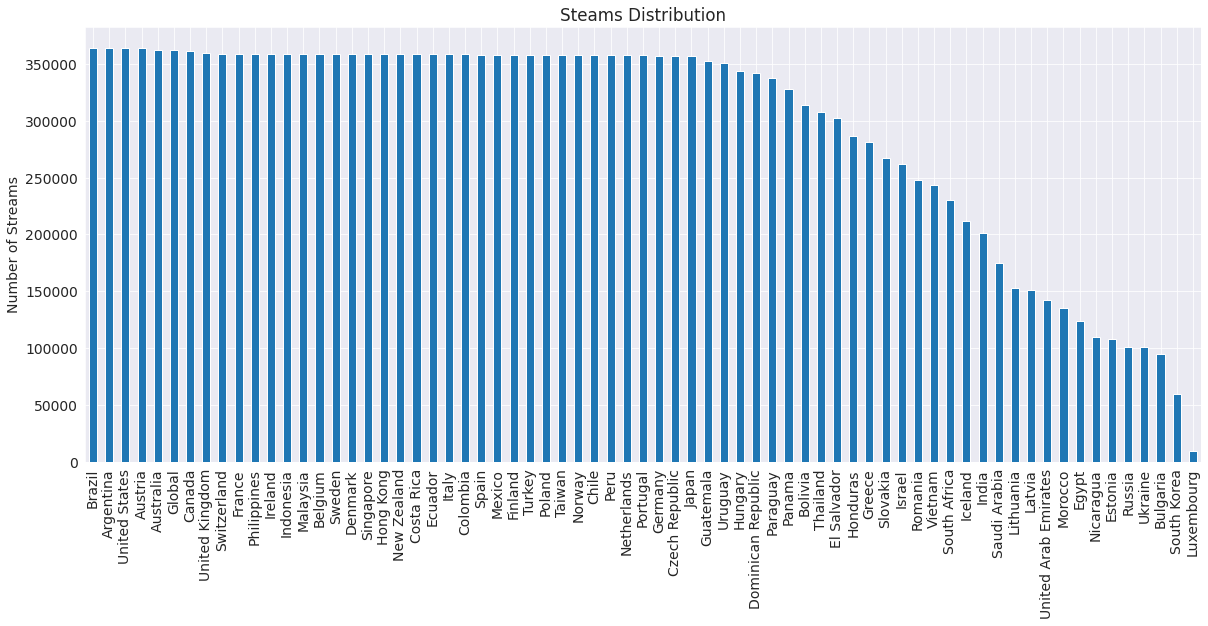

In [ ]:
%time
df["region"].value_counts().plot(kind='bar',
                                       figsize=(20, 8),
                                       ylabel="Number of Streams",
                                       title="Steams Distribution",
                                      );

In [ ]:
%time
from pyspark.sql.functions import count

stream_count = df_py.groupby('region').agg(count('*').alias('count_streams'))
stream_count.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
+--------------------+-------------+
|              region|count_streams|
+--------------------+-------------+
|            Paraguay|       336666|
|              Sweden|       358384|
|         Philippines|       358390|
|            Malaysia|       358390|
|           Singapore|       358388|
|              Turkey|       358190|
|             Germany|       357115|
|              France|       358389|
|              Greece|       281450|
|https://open.spot...|           24|
|              Taiwan|       358187|
|            Slovakia|       267599|
|           Argentina|       364326|
|             Belgium|       358380|
|             Ecuador|       358357|
|https://open.spot...|           93|
|             Finland|       358182|
|          Liro Shaq"|          438|
|           Nicaragua|       109980|
|                Peru|       358137|
+--------------------+-------------+
only showing top 20 rows



Explore the rating distribution of all trends.

**1. Pandas**

In [ ]:
df["trend"].value_counts()

MOVE_DOWN        8975238
MOVE_UP          7833695
SAME_POSITION    2331423
NEW_ENTRY        1181541
Name: trend, dtype: int64

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


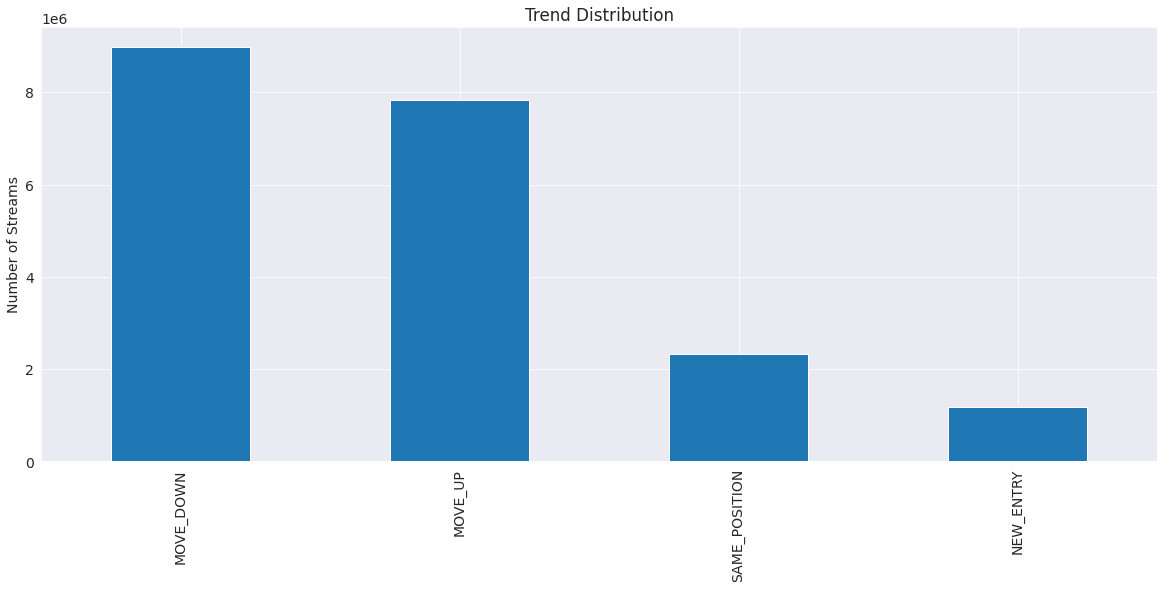

In [ ]:
%time
df["trend"].value_counts().plot(kind='bar',
                                       figsize=(20, 8),
                                       ylabel="Number of Streams",
                                       title="Trend Distribution",
                                      );

**2. Pyspark**

In [ ]:
%time
from pyspark.sql.functions import count

df_py.createOrReplaceTempView('Spotify')
spotify_df = spark.sql('SELECT trend, COUNT(*) FROM Spotify GROUP BY trend;').show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
+--------------------+--------+
|               trend|count(1)|
+--------------------+--------+
|           NEW_ENTRY| 1180960|
|              top200|    2560|
|             viral50|    3116|
|               India|     177|
|https://open.spot...|      21|
|             Bolivia|      36|
|               Spain|      28|
|             Uruguay|      26|
|            Jay Maly|       1|
|           MOVE_DOWN| 8973763|
|             MOVE_UP| 7832235|
|  Dominican Republic|     601|
|       SAME_POSITION| 2331225|
|           Argentina|       4|
|          Costa Rica|      53|
|              Panama|     110|
|https://open.spot...|      10|
|           Guatemala|       6|
|          Jon Secada|       2|
|              Sweden|      11|
+--------------------+--------+
only showing top 20 rows

